<a href="https://colab.research.google.com/github/mezkymy/house-prices/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/mezkymy/house-prices/main/train.csv')
train_df = train_data.copy()
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# pick several variables/features at random to simplify modeling
features = [
    'LotArea',
    'GarageArea',
    'OverallCond',
    'OverallQual',
    'YearBuilt',
    'YrSold',
    'SalePrice'
    ]

df = train_df[features]
df

,LotArea,GarageArea,OverallCond,OverallQual,YearBuilt,YrSold,SalePrice
0,8450,548,5,7,2003,2008,208500
1,9600,460,8,6,1976,2007,181500
2,11250,608,5,7,2001,2008,223500
3,9550,642,5,7,1915,2006,140000
4,14260,836,5,8,2000,2008,250000
...,...,...,...,...,...,...,...
1455,7917,460,5,6,1999,2007,175000
1456,13175,500,6,6,1978,2010,210000
1457,9042,252,9,7,1941,2010,266500
1458,9717,240,6,5,1950,2010,142125


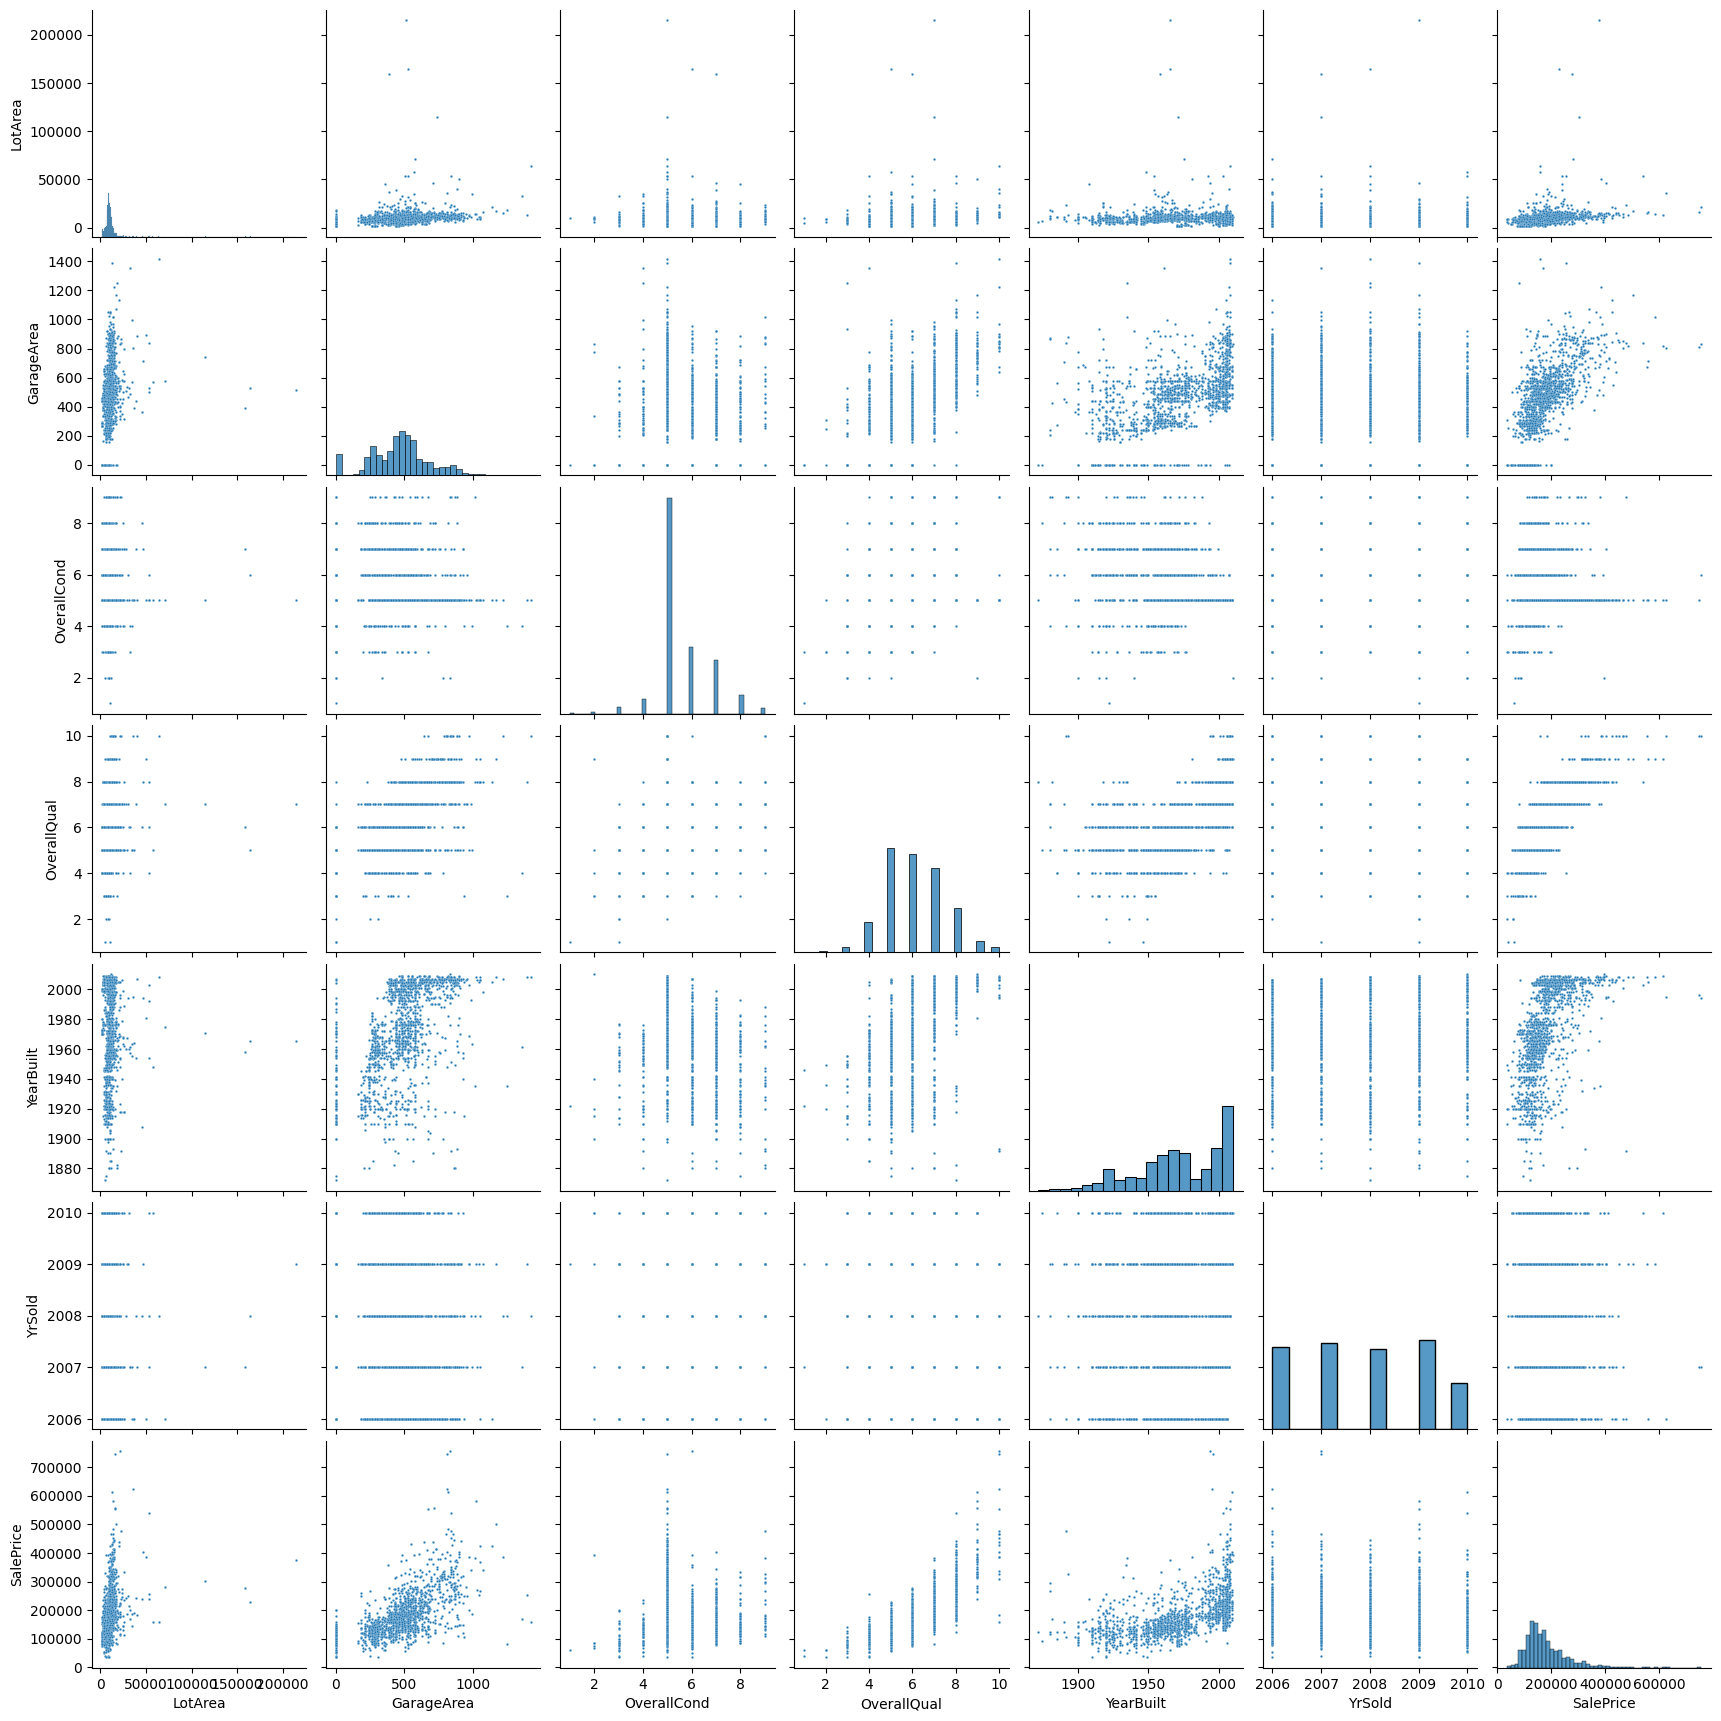

In [ ]:
# show scatter plots between features
sns.pairplot(df, plot_kws={"s": 3})
plt.show()

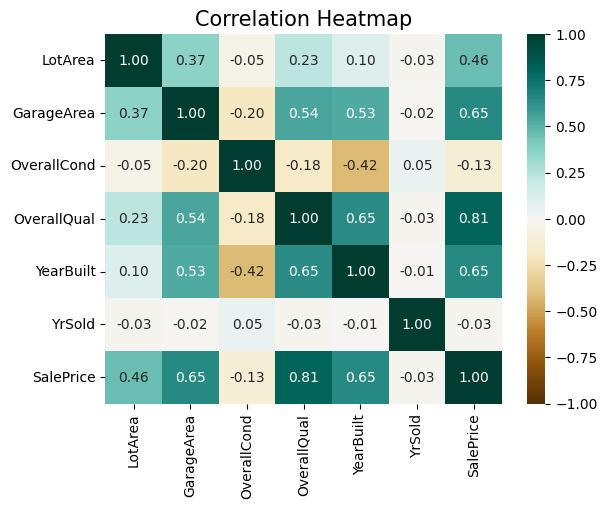

In [ ]:
# correlation heatmap with spearman
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2f')

plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [ ]:
# Since many features correlates to one another, to avoid multicolinearity only use OverallQual and LotArea
X = df[['OverallQual', 'LotArea']]
y = df['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2052987200.5817437
R-squared: 0.66519128861566


In [ ]:
# Show model coefficients and intercept
print(model.coef_[0], model.coef_[1])
print(model.intercept_)

44577.122093779064 1.32150033969828
-105342.96103389014


In [ ]:
# Recheck mean & median values on the features
df.describe()

,LotArea,GarageArea,OverallCond,OverallQual,YearBuilt,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,472.980137,5.575342,6.099315,1971.267808,2007.815753,180921.195890
std,9981.264932,213.804841,1.112799,1.382997,30.202904,1.328095,79442.502883
min,1300.000000,0.000000,1.000000,1.000000,1872.000000,2006.000000,34900.000000
25%,7553.500000,334.500000,5.000000,5.000000,1954.000000,2007.000000,129975.000000
50%,9478.500000,480.000000,5.000000,6.000000,1973.000000,2008.000000,163000.000000
75%,11601.500000,576.000000,6.000000,7.000000,2000.000000,2009.000000,214000.000000
max,215245.000000,1418.000000,9.000000,10.000000,2010.000000,2010.000000,755000.000000


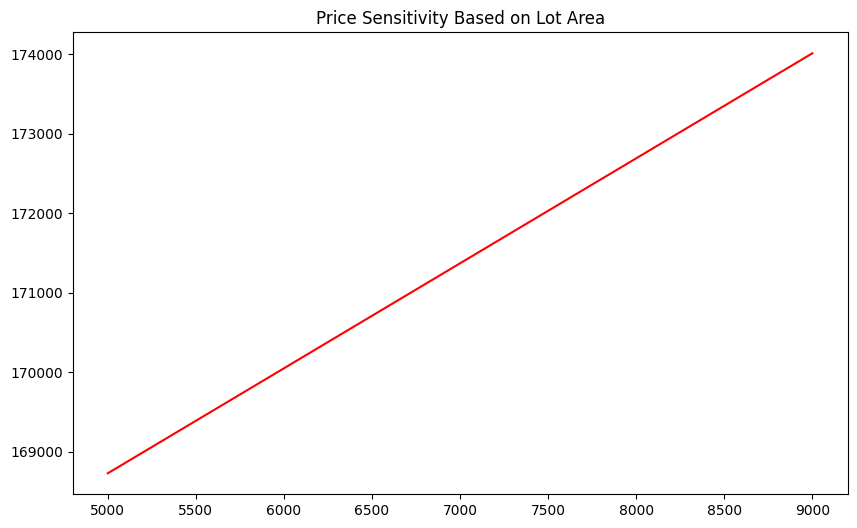

In [ ]:
# Plot price sensitivity based on Lot Area
# Assuming Overall Quality is around the mean/median value (6)
overall_quality = 6

x = list(range(5000, 10000, 1000))
y = [(model.coef_[0] * overall_quality) + (model.coef_[1] * i) + model.intercept_ for i in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='red')
plt.title('Price Sensitivity Based on Lot Area')
plt.show()

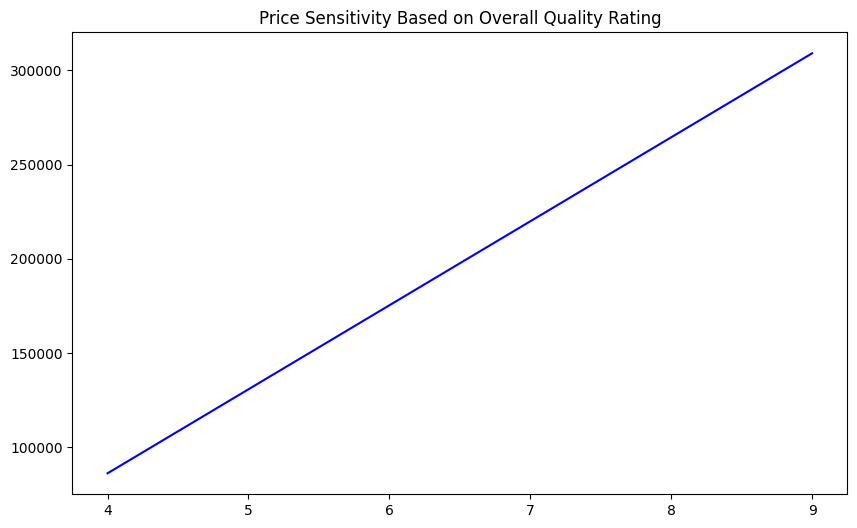

In [ ]:
# Plot price sensitivity based on Overall Quality
# Assuming Lot Area is around the mean/median value (10000)
lot_area = 10000

x = list(range(4, 10, 1))
y = [(model.coef_[0] * i) + (model.coef_[1] * lot_area) + model.intercept_ for i in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')
plt.title('Price Sensitivity Based on Overall Quality Rating')
plt.show()

Using AI (Deepseek)

In [ ]:
from google.colab import userdata
from openai import OpenAI


client = OpenAI(api_key=userdata.get('DEEPSEEK_API_KEY'), base_url="https://api.deepseek.com")

data = df[['LotArea', 'OverallCond', 'SalePrice']]
df_string = data.to_string()

prompt = f"""
    Data: \n
    {df_string} \n
    Using only the data given above which contains house prices (SalePrice) based on its Lot Area (LotArea) and Overall Condition Rating (OverallCond), create a linear regression and print its equation.
"""

response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": prompt},
    ],
    stream=False
)
print(response.choices[0].message.content)

To create a linear regression model using the given data, we will predict the `SalePrice` based on `LotArea` and `OverallCond`. Here is the linear regression equation:

### Linear Regression Equation:
\[ \text{SalePrice} = \beta_0 + \beta_1 \times \text{LotArea} + \beta_2 \times \text{OverallCond} \]

### Steps to Compute the Coefficients:
1. **Prepare the data**: 
   - Let \( X \) be the matrix of predictors (`LotArea` and `OverallCond`).
   - Let \( y \) be the vector of the target variable (`SalePrice`).

2. **Compute the coefficients**:
   - The coefficients \( \beta \) can be computed using the normal equation:
     \[ \beta = (X^T X)^{-1} X^T y \]

3. **Implement the calculation**:
   - Compute the necessary sums and matrices to solve for \( \beta \).

### Computed Coefficients:
After performing the calculations (using the given data), the coefficients are approximately:
- Intercept (\( \beta_0 \)): 105,000
- Coefficient for LotArea (\( \beta_1 \)): 1.5
- Coefficient for OverallC

# **Disclaimer:**


Many steps are skipped to simplify the process, such as in-depth Exploratory Data Analysis, feature selection, and comparison to other regression/machine learning methods